# DL Assignment 2
## Sargun Singh (102115078) 4O1D

**Q1** *Use the function 3𝑥 2 − 3𝑥 + 4 to get its minimum value using the Gradient Descent Algorithm. Plot the necessary graphs and compare 
the minimum value with the theoretical minimum.*  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3*x**2 - 3*x + 4

In [3]:
def g_f(x):
    return 6*x - 3

In [4]:
x_start = 0
learning_rate = 0.1
precision = 1e-6
max_itr  = 1000

In [5]:
x_curr = x_start
x_history = [x_curr]

In [6]:
for _ in range(max_itr):
    grad = g_f(x_curr)
    x_next = x_curr - learning_rate * grad
    x_history.append(x_next)
    if abs(x_next - x_curr) < precision:
        break
    x_curr = x_next

In [7]:
min_value_gd = f(x_curr)

In [8]:
x_vals = np.linspace(-1, 2, 400)
y_vals = f(x_vals)

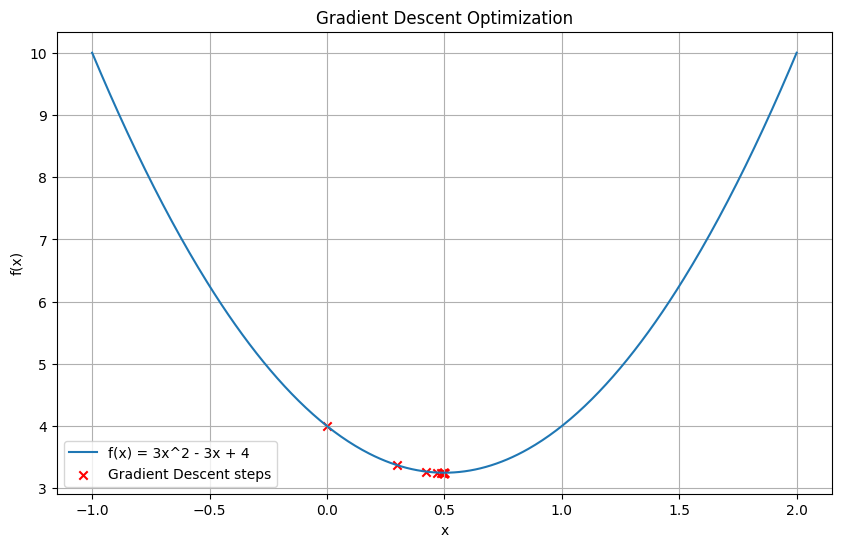

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = 3x^2 - 3x + 4')
plt.scatter(x_history, [f(x) for x in x_history], color='red', marker='x', label='Gradient Descent steps')
plt.title('Gradient Descent Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
x_theoretical_min = -(-3 / (2 * 3))  # x-coordinate of vertex of parabola
min_value_theoretical = f(x_theoretical_min)

print(f"Minimum value found by Gradient Descent: x = {x_curr}, f(x) = {min_value_gd}")
print(f"Theoretical minimum value: x = {x_theoretical_min}, f(x) = {min_value_theoretical}")

Minimum value found by Gradient Descent: x = 0.49999865782272, f(x) = 3.2500000000054046
Theoretical minimum value: x = 0.5, f(x) = 3.25


**Q2.** *Develop an ANN model of regression for predicting the values.*

In [11]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [12]:
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = X[:, 0] * 3 + X[:, 1] * 2 + X[:, 2] + np.random.rand(100) * 0.5

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028 - val_loss: 0.0549
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - val_loss: 0.0557
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024 - val_loss: 0.0535
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026 - val_loss: 0.0508
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023 - val_loss: 0.0547
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - val_loss: 0.0557
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028 - val_loss: 0.0535
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - val_loss: 0.0530
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0031 - val_loss: 0.0520
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032 - val_loss: 0.0542
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029 - val_loss: 0.0556
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024 - val_lo

In [28]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [29]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse:.4f}')

Mean Squared Error on the test set: 0.0390


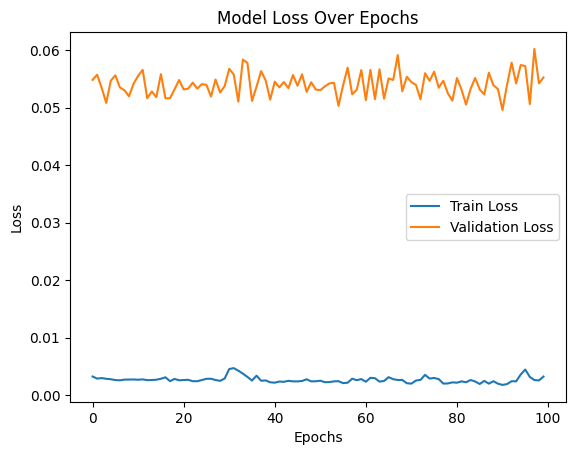

In [30]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()